<a href="https://colab.research.google.com/github/Tanujasri/NASSCOM-MINI-PROJECT/blob/main/ML_PROJECT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#NASCCOM MACHINE LEARNING MINI PROJECT

#NAME: TANUJA  SRI
#ROLLNO:20191C0M0166
#SECTION:5COM3

#ML PROJECT  ON:  Student Grades Prediction

# Whats the use of this model:

In graduate studies, many students find it difficult to achieve good grades because they do not get much support in higher education courses compared to the support that students receive in schools. We can use machine learning for the student grades prediction task so that instructors can help students prepare for topics where student grades were predicted low. In this model, I will walk you through the task of student grades prediction with Machine Learning using Python.

By using machine learning algorithms, we can predict how well the students are going to perform so that we can help the students whose grades are predicted low. Student Grades Prediction is based on the problem of regression in machine learning.

I hope you now have understood why we need to predict the grades of a student. Now let’s see how we can use machine learning for the task of student grades prediction using Python. I will start this task by importing the necessary Python libraries and the dataset:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
%matplotlib inline
data = pd.read_csv("/content/drive/MyDrive/ML datasets/student dataset.csv")

The dataset that I am using for the task of students grade prediction is based on the achievements of the students of the Portuguese schools. In this dataset the G1 represents the grades of the first period, G2 represents the grades of the second period, and G3 represents the final grades. 

Now visualising the data

In [2]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [3]:
data.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3,2,3,3,3,5,5,8,9,9


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [5]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [6]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


#Checking null values

In [7]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

No null values present in the data.So we can proceed to next step

#TRAINING AND TESTING THE DATA

 I first selected the necessary columns that we need to train a machine learning model for the task of student grades prediction.

In [8]:
data = data[["G1", "G2", "G3", "studytime", "failures", "absences"]]  


I declared that the G3 column is our target label and then I split the dataset into 20% testing and 80% training.

In [9]:
predict = "G3"
x = np.array(data.drop([predict], 1))  #predict column is dropped from original data and returns new dataframe
y = np.array(data[predict])



In [10]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2,random_state=100)

#Training the model

In [11]:
from sklearn.linear_model import LinearRegression 

In [12]:
lm=LinearRegression()

In [13]:
lm.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#Printing the coeffecients of the model

In [14]:
lm.intercept_

-1.6305149533057595

In [15]:
lm.coef_

array([ 0.16483779,  0.98114571, -0.20691003, -0.37467111,  0.03670568])

#PREDICTIONS

In [16]:
predictions=lm.predict(xtest)

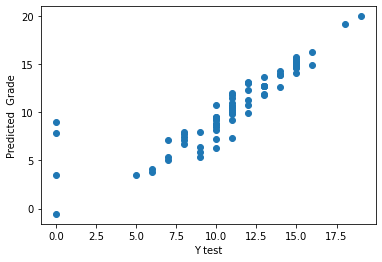

In [17]:
import matplotlib.pyplot as plt
plt.xlabel('Y test')
plt.ylabel('Predicted  Grade')
plt.scatter(ytest,predictions)

#Evaluating the model

In [18]:
from sklearn import metrics

In [19]:
print('MAE:', metrics.mean_absolute_error(ytest, predictions))
print('MSE:', metrics.mean_squared_error(ytest, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, predictions)))

MAE: 1.183614844196992
MSE: 3.602571082209398
RMSE: 1.8980440148240498


In [20]:
metrics.explained_variance_score(ytest, predictions)

0.7540335610223394

In [21]:
linear_regression = LinearRegression()
linear_regression.fit(xtrain, ytrain)
accuracy = linear_regression.score(xtest, ytest)
print(accuracy)

0.7447476712675531


In [22]:
y_pred = lm.predict(xtest)
print('R2 score: %.2f' % r2_score(ytest,y_pred)) # Printing R2 Score

R2 score: 0.74


#The linear regression model gave an accuracy of about 74% which is not bad in this task. Now let’s have a look at the predictions made by the students’ grade prediction model:

In [23]:
predictions = linear_regression.predict(xtest)
for i in range(len(predictions)):
    print(predictions[x], xtest[x], [ytest[x]])

[[ 8.48975067 10.70830632 11.90968613  6.36262145 10.70830632]
 [ 8.48975067  8.48975067 11.90968613  6.36262145  9.56232281]
 [ 9.04082897 14.31109464 11.90968613  7.10259471 11.52052234]
 ...
 [11.52052234 14.31109464  9.56232281  7.10259471  7.10259471]
 [ 8.77007206  7.08105727  9.56232281  6.36262145  6.36262145]
 [14.31109464 10.03882113  9.56232281  6.36262145  8.48975067]] [[[ 9  9  2  0  6]
  [11 11  2  0  4]
  [11 12  2  0 10]
  [ 8  7  2  0  6]
  [11 11  2  0  4]]

 [[ 9  9  2  0  6]
  [ 9  9  2  0  6]
  [11 12  2  0 10]
  [ 8  7  2  0  6]
  [10 10  2  0  4]]

 [[10 10  2  1  0]
  [15 14  2  0  4]
  [11 12  2  0 10]
  [ 8  8  1  1  4]
  [12 11  1  0 16]]

 ...

 [[12 11  1  0 16]
  [15 14  2  0  4]
  [10 10  2  0  4]
  [ 8  8  1  1  4]
  [ 8  8  1  1  4]]

 [[ 9  9  1  0  8]
  [ 5  9  2  2  6]
  [10 10  2  0  4]
  [ 8  7  2  0  6]
  [ 8  7  2  0  6]]

 [[15 14  2  0  4]
  [12 10  2  0  8]
  [10 10  2  0  4]
  [ 8  7  2  0  6]
  [ 9  9  2  0  6]]] [array([[10, 11, 13,  9, 11]